# Rahul Raj 15EE35006 

# Term paper on 'Iterative FDM to calculate Capacitance'

In [1]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy import constants
from pylab import rcParams

In [2]:
epsilon = constants.value(u'electric constant')
dielectric_constant = 5
l = 0.06  #Input length of capacitor
g = 0.00162 #Input gap between plates
w = 0.01  #Input width of capacitor
n_x = 7  #No. of nodes in horizontal direction 
n_y = 7  #No. of nodes in vertical direction
V_l = 5  #Voltage at left plate
V_r = -5  #Voltage at right plate
I = 100 #No. of Iterations
error = 0.000001  #Permissible error in voltage, iteration stopping criteria

In [3]:
#Creating matrix of voltages at all nodes and run iterations
dx = l/(n_x-1)
dy = g/(n_y-1)
k1 = 1/(dx*dx)
k2 = 1/(dy*dy)
k3 = k1+k2
const1 = 0.5*(k1/k3)
const2 = 0.5*(k2/k3)
V = np.zeros((n_x, n_y))
for i in range (n_x):
    for j in range (n_y):
        if (j==0):
            V[i][j]=V_l
        if (j==(n_x-1)):
            V[i][j]=V_r
        if ((i==0 and j==0) or (i==(n_y-1) and j==0)):
            V[i][j] = 5*const1
        if ((i==0 and j==(n_x-1)) or (i==(n_y-1) and j==(n_x-1))):
            V[i][j] = -5*const1
print(V)

[[  1.82117237e-03   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00  -1.82117237e-03]
 [  5.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00  -5.00000000e+00]
 [  5.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00  -5.00000000e+00]
 [  5.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00  -5.00000000e+00]
 [  5.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00  -5.00000000e+00]
 [  5.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00  -5.00000000e+00]
 [  1.82117237e-03   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00  -1.82117237e-03]]


In [4]:
lst = []
for k in range(I):
    for i in range (1,n_y-1):
        for j in range(1, n_x-1):
            V[i][j] = 0.5*((k1/k3)*(V[i-1][j] + V[i+1][j]) + (k2/k3)*(V[i][j-1] + V[i][j+1]))
    lst.append(V[3][1])
print(V)

[[  1.82117237e-03   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00  -1.82117237e-03]
 [  5.00000000e+00   3.33131108e+00   1.66504922e+00   5.95509932e-13
   -1.66504922e+00  -3.33131108e+00  -5.00000000e+00]
 [  5.00000000e+00   3.33333196e+00   1.66666539e+00   6.36553935e-13
   -1.66666539e+00  -3.33333196e+00  -5.00000000e+00]
 [  5.00000000e+00   3.33333333e+00   1.66666666e+00   6.38120921e-13
   -1.66666666e+00  -3.33333333e+00  -5.00000000e+00]
 [  5.00000000e+00   3.33333196e+00   1.66666539e+00   6.35654821e-13
   -1.66666539e+00  -3.33333196e+00  -5.00000000e+00]
 [  5.00000000e+00   3.33131108e+00   1.66504922e+00   5.81786483e-13
   -1.66504922e+00  -3.33131108e+00  -5.00000000e+00]
 [  1.82117237e-03   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00  -1.82117237e-03]]


In [5]:
#Calculating Electric Field
dx = g/(n_x-1)  #width for each square element
#Creating matrix for Electric field between nodes
E = np.zeros((n_x-2, n_y-1))  
for i in range(n_y-2):
    for j in range(n_x-1):
        E[i][j] = (V[i+1][j]-V[i+1][j+1])/dx
print(E)

[[ 6180.32931829  6171.34023473  6166.84896549  6166.8489655   6171.34023473
   6180.32931829]
 [ 6172.84459468  6172.83914203  6172.83478181  6172.83478181
   6172.83914203  6172.84459469]
 [ 6172.8395134   6172.839506    6172.83949912  6172.83949912  6172.839506
   6172.83951341]
 [ 6172.84459468  6172.83914203  6172.83478181  6172.83478181
   6172.83914203  6172.84459469]
 [ 6180.32931829  6171.34023473  6166.84896549  6166.8489655   6171.34023473
   6180.32931829]]


In [6]:
#Calculating Flux Density
epsilon_r = epsilon*dielectric_constant  #permittivity of medium between plates
#Creating matrix for Flux Density between nodes
D = np.zeros((n_x-2, n_y-1))  
for i in range(n_y-2):
    for j in range(n_x-1):
        D[i][j] = E[i][j]*epsilon_r
print(D)

[[  2.73608983e-07   2.73211028e-07   2.73012195e-07   2.73012195e-07
    2.73211028e-07   2.73608983e-07]
 [  2.73277627e-07   2.73277386e-07   2.73277193e-07   2.73277193e-07
    2.73277386e-07   2.73277627e-07]
 [  2.73277402e-07   2.73277402e-07   2.73277401e-07   2.73277401e-07
    2.73277402e-07   2.73277402e-07]
 [  2.73277627e-07   2.73277386e-07   2.73277193e-07   2.73277193e-07
    2.73277386e-07   2.73277627e-07]
 [  2.73608983e-07   2.73211028e-07   2.73012195e-07   2.73012195e-07
    2.73211028e-07   2.73608983e-07]]


In [7]:
#Calculating Total Flux
Total_Flux = D[2][2]
print(Total_Flux)

2.73277401466e-07


In [8]:
#Calculating Charge
Area = l*w
Q = Total_Flux*Area
print(Q)

1.6396644088e-10


In [9]:
#Calculating Capacitance
C = Q/(V_l-V_r)
print(C)

1.6396644088e-11


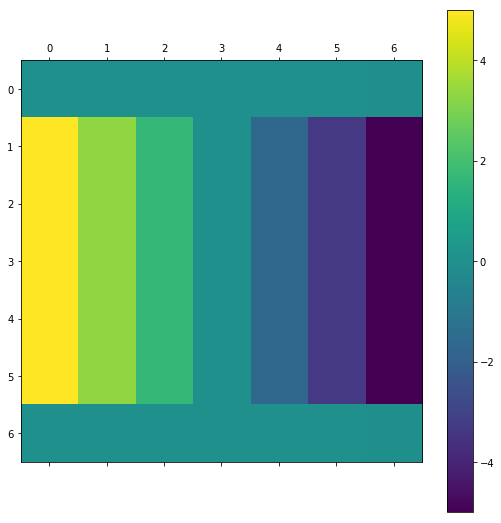

In [10]:
#Plot Voltage Matrix
plt.rcParams["figure.figsize"] = (12,9)
plt.matshow(V)
plt.colorbar()

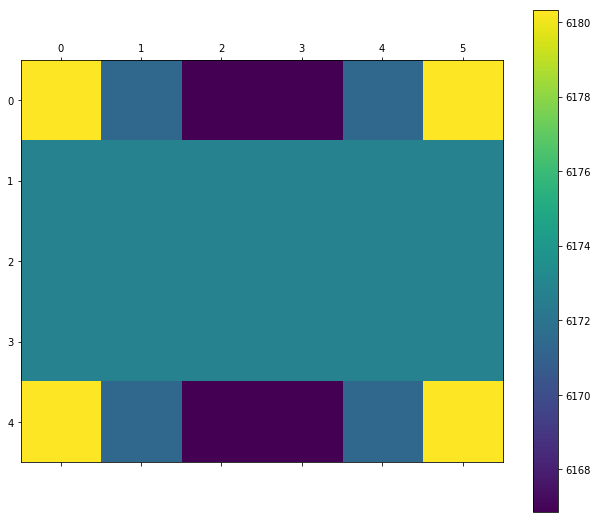

In [11]:
#Plot Field Matrix
plt.rcParams["figure.figsize"] = (12,9)
plt.matshow(E)
plt.colorbar()

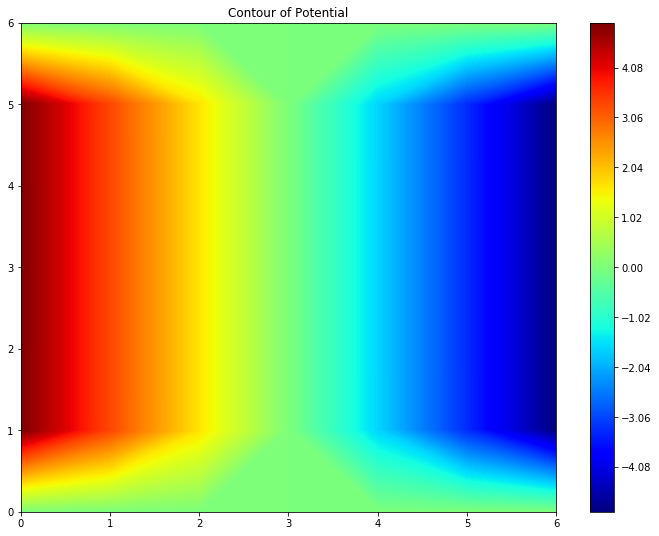

In [12]:
#Contour of Potential
plt.rcParams["figure.figsize"] = (12,9)
colorinterpolation = 500
colourMap = plt.cm.jet
lenX=lenY=7
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))
plt.title("Contour of Potential")
plt.contourf(X, Y, V, colorinterpolation, cmap=colourMap)
plt.colorbar()
plt.show()


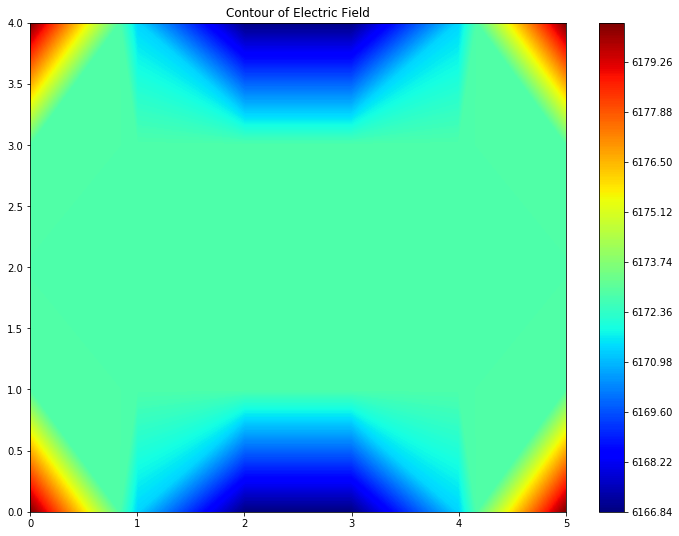

In [13]:
#Contour of Electric Field
plt.rcParams["figure.figsize"] = (12,9)
colorinterpolation = 500
colourMap = plt.cm.jet
lenX=6
lenY=5
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))
plt.title("Contour of Electric Field")
plt.contourf(X, Y, E, colorinterpolation, cmap=colourMap)
plt.colorbar()
plt.show()

In [16]:
pd.DataFrame(E).to_csv("ElectricFields.csv")
pd.DataFrame(V).to_csv("voltages.csv")